In [45]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [46]:
#load the csv file and read in
csv_data = pd.read_csv('merged_df.csv')

# Read the values of the file in the dataframe
df = pd.DataFrame(csv_data)

In [47]:
#adding area_group column
#load the xlsx file and read in the 4th sheet
excel_data = pd.read_excel('LPI_Legatum_Prosperity_Index_Indicators_Sheet4.xlsx')

# convert into dataframe
df2 = pd.DataFrame(excel_data)

#create df with just columns needed for merge
df3 = df2[['area_name','area_group']]

#rename column to prepare for merge
df3 = df3.rename(columns={'area_name': 'country'})

#drop duplicates
df3 = df3.drop_duplicates()

#repeat values in entire df by 11
df4 = pd.DataFrame(np.repeat(df3.values, 11, axis=0))
df4.columns = df3.columns

#merge df3 dataframe with existing dataframe
df = pd.merge(df, df3, on=['country'], how='left', indicator=False)

In [48]:
#view columns of initial df
df.columns

Index(['country', 'year', 'social_progress_index',
       'deaths_from_interpersonal_violence', 'perceived_criminality',
       'media_censorship', 'access_to_justice', 'freedom_of_expression',
       'freedom_of_religion', 'discrimination_and_violence_against_minorities',
       'acceptance_of_gays_and_lesbians', 'network_coverage',
       'civil_ethnic_war', 'bank_branches', 'confidence_in_police',
       'equal_treatment', 'freedom_of_belief_religion',
       'freedom_opinion_expression', 'generalised_interpersonal_trust',
       'government_media_censorship', 'government_intimidation',
       'helped_stranger', 'intentional_homicides',
       'international_internet_bandwidth', 'lgbt_rights',
       'nondiscriminatory_civil_justice', 'physical_security_women',
       'property_stolen', 'protection_womens_rights', 'reliable_electricity',
       'reliability_water_supply', 'respect', 'safety_walking_alone_night',
       'satisfaction_with_freedom', 'satisfaction_with_public_transport

In [127]:
df.country.value_counts()

Belarus           11
American Samoa    11
Tonga             11
Argentina         11
Taiwan            11
                  ..
Ukraine           11
Sudan             11
Micronesia        11
Mauritius         11
Cambodia          11
Name: country, Length: 206, dtype: int64

In [49]:
#view first 10 rows of initial df
df.head(5)

,country,year,social_progress_index,deaths_from_interpersonal_violence,perceived_criminality,media_censorship,access_to_justice,freedom_of_expression,freedom_of_religion,discrimination_and_violence_against_minorities,acceptance_of_gays_and_lesbians,network_coverage,civil_ethnic_war,bank_branches,confidence_in_police,equal_treatment,freedom_of_belief_religion,freedom_opinion_expression,generalised_interpersonal_trust,government_media_censorship,government_intimidation,helped_stranger,intentional_homicides,international_internet_bandwidth,lgbt_rights,nondiscriminatory_civil_justice,physical_security_women,property_stolen,protection_womens_rights,reliable_electricity,reliability_water_supply,respect,safety_walking_alone_night,satisfaction_with_freedom,satisfaction_with_public_transportation,terrorism_incidents,twosided_conflict_deaths,digital_payments,womens_agency,_merge,area_group
0,Albania,2021,74.51,1.9836,4.0,1.348,0.906,0.687,3.708,4.1,0.15,0.976200,1.0,0.594172,0.5625,0.482932,0.788223,0.532894,0.037333,0.33700,0.773810,0.614286,0.702317,0.668192,0.333333,0.459320,0.333333,0.80,0.666667,0.571429,0.512186,0.72,0.6000,0.674778,0.481697,0.900225,1.0,0.288224,0.4375,both,Eastern Europe
1,Albania,2020,73.80,2.0420,4.0,1.811,0.906,0.707,3.708,4.4,0.08,0.978200,1.0,0.602393,0.4875,0.482932,0.788223,0.532894,0.037333,0.45275,0.773810,0.428571,0.724434,0.668192,0.333333,0.459320,0.333333,0.78,0.666667,0.571429,0.512186,0.84,0.5375,0.713099,0.540268,0.852441,1.0,0.200112,0.4375,both,Eastern Europe
2,Albania,2019,74.18,2.0796,4.0,1.811,0.852,0.723,3.864,4.3,0.10,0.955033,1.0,0.613526,0.5750,0.485104,0.816937,0.553333,0.037333,0.45275,0.773810,0.471429,0.670433,0.668192,0.333333,0.408963,0.333333,0.74,0.666667,0.285714,0.454710,0.84,0.5750,0.772754,0.627890,0.838197,1.0,0.200112,0.4375,both,Eastern Europe
3,Albania,2018,73.93,2.1282,4.0,2.367,0.852,0.818,3.739,4.2,0.13,0.902100,1.0,0.622147,0.5875,0.460922,0.888371,0.572949,0.140811,0.59175,0.773810,0.385714,0.708111,0.648619,0.333333,0.419274,0.333333,0.72,0.666667,0.285714,0.520858,0.78,0.5000,0.675039,0.551790,0.824318,1.0,0.200112,0.4375,both,Eastern Europe
4,Albania,2017,73.90,2.1680,4.0,2.367,0.904,0.784,3.899,4.5,0.11,0.852667,1.0,0.625112,0.6125,0.460922,0.888371,0.572949,0.140811,0.59175,0.595238,0.400000,0.595667,0.629771,0.333333,0.419274,0.333333,0.76,0.666667,0.142857,0.520858,0.78,0.5250,0.645759,0.485045,0.838303,1.0,0.200112,0.4375,both,Eastern Europe


In [50]:
#convert to comparable scales

#social_progress_index-- assuming 1-100%
df['social_progress_index'] = df['social_progress_index']*.01
#perceived_criminality--1=low; 5=high
df['perceived_criminality'] = df['perceived_criminality']*.2
#media_censorship--0=frequent; 4=rare
df['media_censorship'] = df['media_censorship']*.25
#freedom_of_religion--0=no freedom; 4=full freedom
df['freedom_of_religion'] = df['freedom_of_religion']*.25
#discrimination_and_violence_against_minorities--0=low; 10=high
df['discrimination_and_violence_against_minorities'] = df['discrimination_and_violence_against_minorities']*.10

In [51]:
#summary stats for variables from spi dataset
df.describe()

,year,social_progress_index,deaths_from_interpersonal_violence,perceived_criminality,media_censorship,access_to_justice,freedom_of_expression,freedom_of_religion,discrimination_and_violence_against_minorities,acceptance_of_gays_and_lesbians,network_coverage,civil_ethnic_war,bank_branches,confidence_in_police,equal_treatment,freedom_of_belief_religion,freedom_opinion_expression,generalised_interpersonal_trust,government_media_censorship,government_intimidation,helped_stranger,intentional_homicides,international_internet_bandwidth,lgbt_rights,nondiscriminatory_civil_justice,physical_security_women,property_stolen,protection_womens_rights,reliable_electricity,reliability_water_supply,respect,safety_walking_alone_night,satisfaction_with_freedom,satisfaction_with_public_transportation,terrorism_incidents,twosided_conflict_deaths,digital_payments,womens_agency
count,2266.000000,1848.000000,2222.000000,1765.000000,1914.000000,1914.000000,1914.000000,1914.000000,1937.000000,1506.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,2016.000000,0.653060,7.607371,0.638059,0.587339,0.662883,0.669748,0.788100,0.600044,0.313330,0.725964,0.925971,0.497130,0.557894,0.460787,0.634958,0.557693,0.325832,0.587215,0.711765,0.509975,0.600528,0.541203,0.323353,0.502266,0.296414,0.668715,0.543875,0.512991,0.589372,0.706022,0.514216,0.661037,0.605171,0.864687,0.888485,0.425198,0.503232
std,3.162976,0.156637,10.034575,0.203413,0.294805,0.260346,0.282537,0.234518,0.209811,0.254851,0.220399,0.201317,0.180540,0.189471,0.198767,0.165032,0.188886,0.187625,0.295300,0.252369,0.189612,0.225424,0.166748,0.310916,0.169997,0.288687,0.192130,0.199876,0.364138,0.234281,0.179115,0.193559,0.183268,0.206733,0.229792,0.231612,0.297020,0.284457
min,2011.000000,0.287900,0.365200,0.200000,0.009250,0.030000,0.012000,0.016250,0.050000,0.010000,0.233333,0.000000,0.069890,0.000000,0.004075,0.049751,0.058794,0.028556,0.009250,0.000000,0.000000,0.000000,0.000000,0.000000,0.006807,0.000000,0.000000,0.000000,0.000000,0.089117,0.000000,0.000000,0.055819,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.523275,1.496525,0.600000,0.364375,0.500000,0.476250,0.712250,0.430000,0.100000,0.545667,1.000000,0.351389,0.425000,0.319418,0.552346,0.398700,0.190523,0.359250,0.511905,0.371429,0.469396,0.438218,0.000000,0.378820,0.000000,0.560000,0.400000,0.142857,0.420836,0.620000,0.363334,0.542080,0.485652,0.859073,0.912698,0.173137,0.250000
50%,2016.000000,0.659850,4.196450,0.600000,0.660500,0.717500,0.773000,0.890625,0.600000,0.230000,0.755067,1.000000,0.507353,0.562500,0.459739,0.664583,0.562654,0.285834,0.650250,0.761905,0.514286,0.623421,0.561774,0.333333,0.492562,0.333333,0.720000,0.533333,0.571429,0.583091,0.740000,0.500000,0.689613,0.638857,0.966365,1.000000,0.352081,0.500000
75%,2019.000000,0.777800,9.816225,0.800000,0.825250,0.889000,0.896000,0.955188,0.760000,0.480000,0.936362,1.000000,0.636716,0.700000,0.596979,0.747919,0.706599,0.398380,0.827000,0.940476,0.652941,0.785976,0.650416,0.333333,0.633708,0.333333,0.800000,0.733333,0.857143,0.803961,0.840000,0.662500,0.808533,0.744009,0.996803,1.000000,0.656416,0.750000
max,2021.000000,0.927300,103.605800,1.000000,0.985000,0.997000,0.993000,0.993750,1.000000,0.920000,1.000000,1.000000,0.918459,0.987500,0.971000,0.915402,0.973083,1.000000,0.985000,1.000000,0.971429,1.000000,1.000000,1.000000,0.967342,1.000000,0.980000,0.933333,1.000000,1.000000,0.960000,0.962500,0.972182,1.000000,1.000000,1.000000,0.993941,1.000000


In [52]:
df.dtypes

country                                            object
year                                                int64
social_progress_index                             float64
deaths_from_interpersonal_violence                float64
perceived_criminality                             float64
media_censorship                                  float64
access_to_justice                                 float64
freedom_of_expression                             float64
freedom_of_religion                               float64
discrimination_and_violence_against_minorities    float64
acceptance_of_gays_and_lesbians                   float64
network_coverage                                  float64
civil_ethnic_war                                  float64
bank_branches                                     float64
confidence_in_police                              float64
equal_treatment                                   float64
freedom_of_belief_religion                        float64
freedom_opinio

In [53]:
#check if any values are NaN in merged dataset
df.isnull().values.any()

True

In [54]:
#Count the NaN under an entire DataFrame
df.isnull().sum().sum()

15912

In [55]:
#check shape of df
df.shape

(2266, 41)

In [56]:
#calculate subgroup size of text/categorical data
df['country'].value_counts()

Belarus           11
American Samoa    11
Tonga             11
Argentina         11
Taiwan            11
                  ..
Ukraine           11
Sudan             11
Micronesia        11
Mauritius         11
Cambodia          11
Name: country, Length: 206, dtype: int64

In [57]:
df['year'].value_counts()

2012    206
2014    206
2016    206
2018    206
2020    206
2011    206
2013    206
2015    206
2017    206
2019    206
2021    206
Name: year, dtype: int64

In [58]:
#compute correlation
df.corr()

,year,social_progress_index,deaths_from_interpersonal_violence,perceived_criminality,media_censorship,access_to_justice,freedom_of_expression,freedom_of_religion,discrimination_and_violence_against_minorities,acceptance_of_gays_and_lesbians,network_coverage,civil_ethnic_war,bank_branches,confidence_in_police,equal_treatment,freedom_of_belief_religion,freedom_opinion_expression,generalised_interpersonal_trust,government_media_censorship,government_intimidation,helped_stranger,intentional_homicides,international_internet_bandwidth,lgbt_rights,nondiscriminatory_civil_justice,physical_security_women,property_stolen,protection_womens_rights,reliable_electricity,reliability_water_supply,respect,safety_walking_alone_night,satisfaction_with_freedom,satisfaction_with_public_transportation,terrorism_incidents,twosided_conflict_deaths,digital_payments,womens_agency
year,1.000000e+00,0.094709,-0.037821,0.072636,-0.046370,-0.023757,-0.048872,-0.030131,-0.035023,0.127136,0.298988,-0.024071,-0.007011,0.084757,-0.044178,-0.055665,-0.049781,-0.061370,-0.049726,-0.090055,0.130095,0.048885,0.176585,0.090826,-0.025857,-0.002386,-0.004571,-0.009189,0.078782,0.014994,0.064544,0.062728,0.182602,0.067630,-0.126810,-0.018038,0.041669,-8.634453e-15
social_progress_index,9.470855e-02,1.000000,-0.238964,-0.558679,0.520819,0.720505,0.535117,0.376064,-0.552638,0.681907,0.772971,0.328220,0.739491,0.300637,0.665600,0.501137,0.667125,0.328361,0.530475,0.221838,-0.172048,0.389379,0.748655,0.638974,0.674745,0.708099,0.490282,0.679290,0.812073,0.856301,0.440250,0.356340,0.407081,0.472586,0.183559,0.398998,0.811561,8.447383e-01
deaths_from_interpersonal_violence,-3.782126e-02,-0.238964,1.000000,0.369865,0.024607,-0.242136,0.046741,0.144878,0.057043,-0.067130,-0.255080,-0.056142,-0.130983,-0.398681,-0.334082,0.026923,-0.053628,-0.241128,0.031805,0.216188,0.129306,-0.748643,-0.124809,-0.032768,-0.257838,-0.248399,-0.239880,-0.105063,-0.209062,-0.324650,0.005589,-0.427759,-0.024343,-0.012879,0.007060,-0.078276,-0.237518,-8.669804e-02
perceived_criminality,7.263591e-02,-0.558679,0.369865,1.000000,-0.281997,-0.545409,-0.265680,-0.173514,0.573242,-0.425938,-0.403884,-0.369111,-0.341244,-0.470382,-0.563573,-0.255210,-0.379337,-0.369296,-0.273520,-0.161551,0.025426,-0.515459,-0.321350,-0.288121,-0.468003,-0.474017,-0.240151,-0.318246,-0.448498,-0.573708,-0.200304,-0.411240,-0.391026,-0.262167,-0.342128,-0.446464,-0.530267,-4.401188e-01
media_censorship,-4.637026e-02,0.520819,0.024607,-0.281997,1.000000,0.691943,0.936490,0.634767,-0.403772,0.502558,0.211174,0.154376,0.361303,0.056050,0.449500,0.673511,0.810597,0.189347,0.979339,0.488340,-0.018985,0.040366,0.237594,0.450181,0.447654,0.534594,0.014793,0.448377,0.260726,0.297085,0.315884,0.009043,0.274283,0.071360,0.114159,0.222364,0.412472,4.970251e-01
access_to_justice,-2.375704e-02,0.720505,-0.242136,-0.545409,0.691943,1.000000,0.748448,0.603258,-0.541016,0.472828,0.440880,0.365490,0.474457,0.286341,0.664688,0.570790,0.699829,0.197926,0.674280,0.416144,-0.081300,0.312115,0.422318,0.437985,0.649285,0.600134,0.168535,0.477354,0.476193,0.537087,0.308982,0.219406,0.322397,0.233199,0.304976,0.459974,0.579575,5.558683e-01
freedom_of_expression,-4.887171e-02,0.535117,0.046741,-0.265680,0.936490,0.748448,1.000000,0.701741,-0.418253,0.449442,0.179574,0.201978,0.352903,-0.031265,0.465719,0.704225,0.804253,0.145749,0.909578,0.532223,-0.065834,0.021843,0.223517,0.463052,0.466763,0.521554,0.003596,0.473066,0.280905,0.261662,0.292802,-0.071137,0.202861,0.035572,0.182805,0.261861,0.380257,4.988029e-01
freedom_of_religion,-3.013139e-02,0.376064,0.144878,-0.173514,0.634767,0.603258,0.701741,1.000000,-0.401283,0.345522,0.093430,0.279748,0.202069,-0.081245,0.392829,0.743884,0.603770,0.025171,0.613010,0.612224,-0.060258,-0.107555,0.141277,0.402222,0.423716,0.412945,-0.127712,0.490300,0.130038,0.137248,0.167630,-0.181921,0.221134,-0.022663,0.306003,0.343842,0.251043,4.357624e-01
discrimination_and_violence_against_minorities,-3.502299e-02,-0.

In [59]:
# Create correlation matrix
corr_mat = df.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort ascending
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat.head(15)

intentional_homicides                           deaths_from_interpersonal_violence               -0.748643
deaths_from_interpersonal_violence              intentional_homicides                            -0.748643
perceived_criminality                           reliability_water_supply                         -0.573708
reliability_water_supply                        perceived_criminality                            -0.573708
perceived_criminality                           equal_treatment                                  -0.563573
equal_treatment                                 perceived_criminality                            -0.563573
social_progress_index                           perceived_criminality                            -0.558679
perceived_criminality                           social_progress_index                            -0.558679
equal_treatment                                 discrimination_and_violence_against_minorities   -0.556024
discrimination_and_violence_against_m

In [60]:
# Create correlation matrix
corr_mat = df.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort descending
desc_sorted_mat = corr_mat.unstack().sort_values(ascending=False)
desc_sorted_mat

year                                year                                  1.000000
government_intimidation             government_intimidation               1.000000
generalised_interpersonal_trust     generalised_interpersonal_trust       1.000000
freedom_opinion_expression          freedom_opinion_expression            1.000000
freedom_of_belief_religion          freedom_of_belief_religion            1.000000
                                                                            ...   
perceived_criminality               equal_treatment                      -0.563573
reliability_water_supply            perceived_criminality                -0.573708
perceived_criminality               reliability_water_supply             -0.573708
deaths_from_interpersonal_violence  intentional_homicides                -0.748643
intentional_homicides               deaths_from_interpersonal_violence   -0.748643
Length: 1444, dtype: float64

In [61]:
#create variables for women, race, safety, social, convenience and LGBT+ values
#social tolerance, inclusiveness
#access

safety = df[['perceived_criminality', 'civil_ethnic_war', 'confidence_in_police', 'generalised_interpersonal_trust', 'helped_stranger',                                   
'intentional_homicides', 'property_stolen', 'safety_walking_alone_night', 'terrorism_incidents','twosided_conflict_deaths']]
women = df[['physical_security_women', 'protection_womens_rights', 'womens_agency']]  
race = df[['discrimination_and_violence_against_minorities', 'equal_treatment','nondiscriminatory_civil_justice']]
social = df[['media_censorship', 'access_to_justice','freedom_of_expression','freedom_of_religion','freedom_of_belief_religion',
            'freedom_opinion_expression', 'government_media_censorship','government_intimidation', 'respect', 'satisfaction_with_freedom']]                          
access = df[['network_coverage', 'bank_branches', 'international_internet_bandwidth', 'reliable_electricity','reliability_water_supply',
            'satisfaction_with_public_transportation', 'digital_payments']]
lgbtplus = df[['acceptance_of_gays_and_lesbians', 'lgbt_rights', 'equal_treatment', 'nondiscriminatory_civil_justice']]

In [62]:
#univariate analysis of data distribution plot to

[Text(0.5, 1.0, 'Safety Variables Correlation Heat Map')]

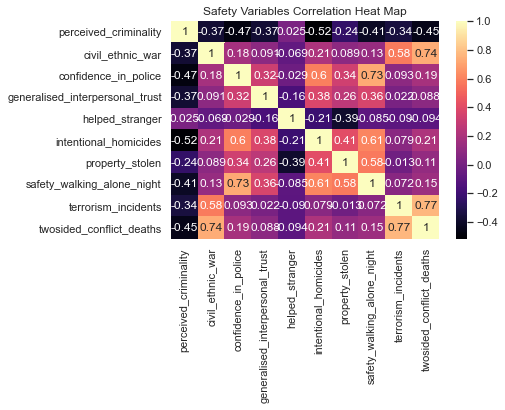

In [63]:
sns.heatmap(safety.corr(), annot = True, cmap = 'magma').set(title='Safety Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Safety Variables Correlation Heat Map')]

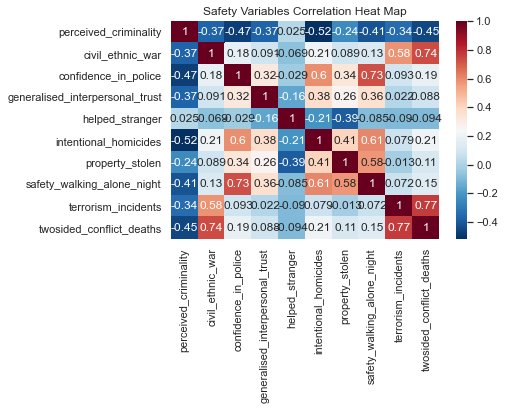

In [149]:
sns.heatmap(safety.corr(), annot = True, cmap = 'RdBu_r').set(title='Safety Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Womens Variables Correlation Heat Map')]

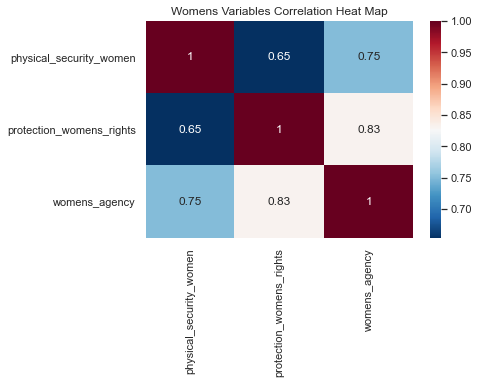

In [150]:
sns.heatmap(women.corr(), annot = True, cmap = 'RdBu_r').set(title='Womens Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Race Variables Correlation Heat Map')]

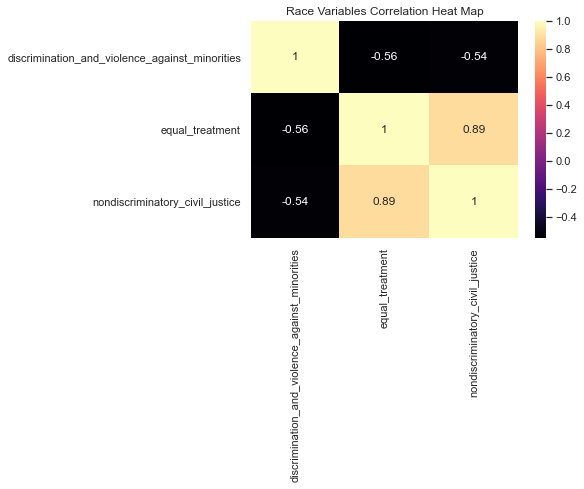

In [65]:
sns.heatmap(race.corr(), annot = True, cmap = 'magma').set(title='Race Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Race Variables Correlation Heat Map')]

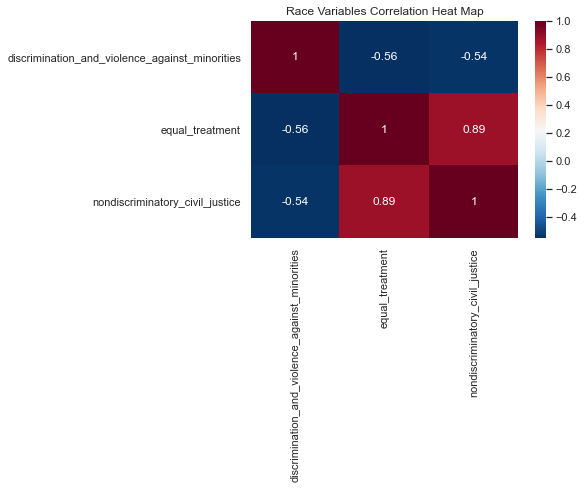

In [151]:
sns.heatmap(race.corr(), annot = True, cmap = 'RdBu_r').set(title='Race Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Social Justice Variables Correlation Heat Map')]

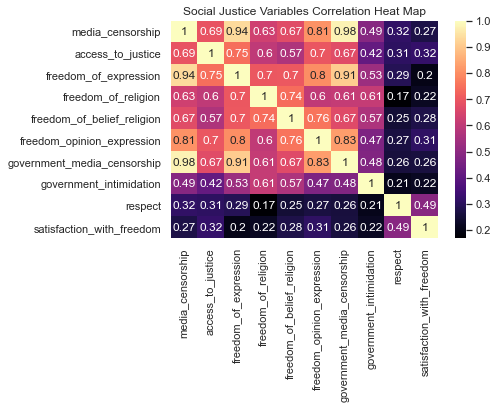

In [66]:
sns.heatmap(social.corr(), annot = True, cmap = 'magma').set(title='Social Justice Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Social Justice Variables Correlation Heat Map')]

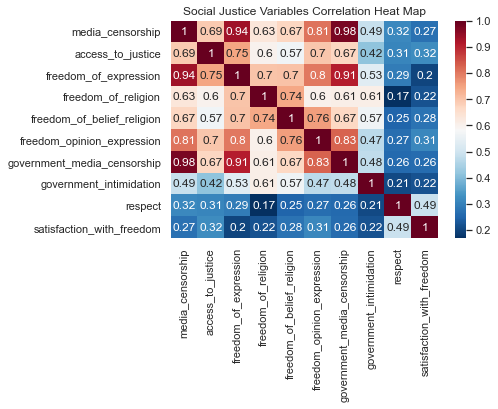

In [152]:
sns.heatmap(social.corr(), annot = True, cmap = 'RdBu_r').set(title='Social Justice Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Access/Convenience Variables Correlation Heat Map')]

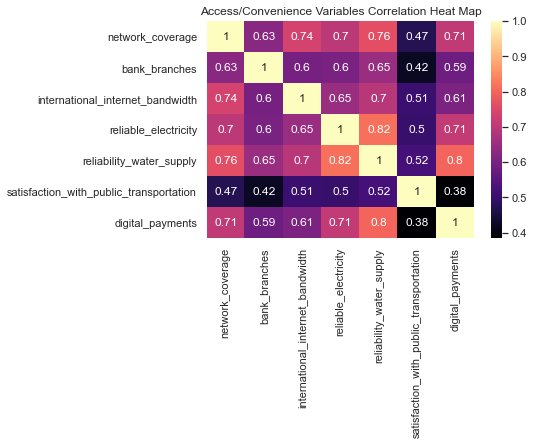

In [67]:
sns.heatmap(access.corr(), annot = True, cmap = 'magma').set(title='Access/Convenience Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Access/Convenience Variables Correlation Heat Map')]

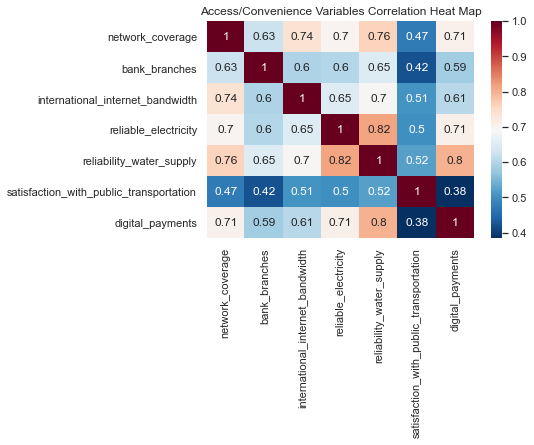

In [153]:
sns.heatmap(access.corr(), annot = True, cmap = 'RdBu_r').set(title='Access/Convenience Variables Correlation Heat Map')

[Text(0.5, 1.0, 'LGBT+ Variables Correlation Heat Map')]

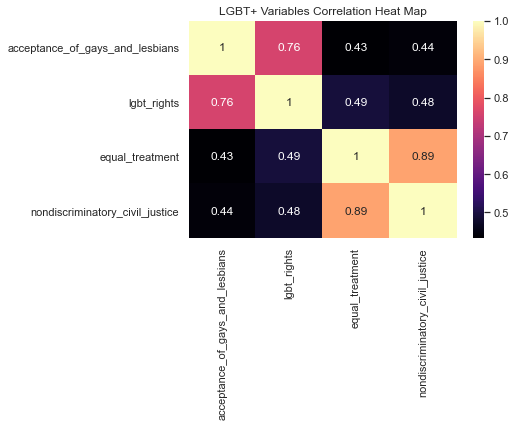

In [68]:
sns.heatmap(lgbtplus.corr(), annot = True, cmap = 'magma').set(title='LGBT+ Variables Correlation Heat Map')

[Text(0.5, 1.0, 'LGBT+ Variables Correlation Heat Map')]

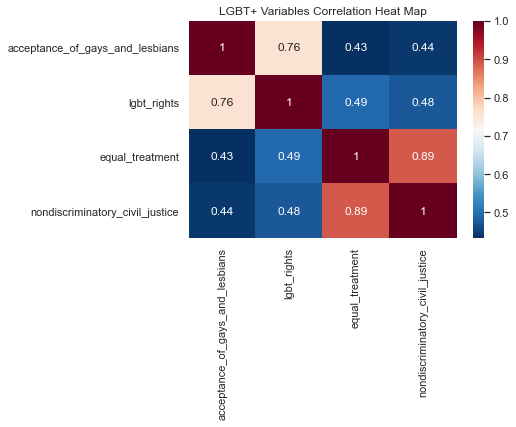

In [154]:
sns.heatmap(lgbtplus.corr(), annot = True, cmap = 'RdBu_r').set(title='LGBT+ Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Variables Correlation Heat Map')]

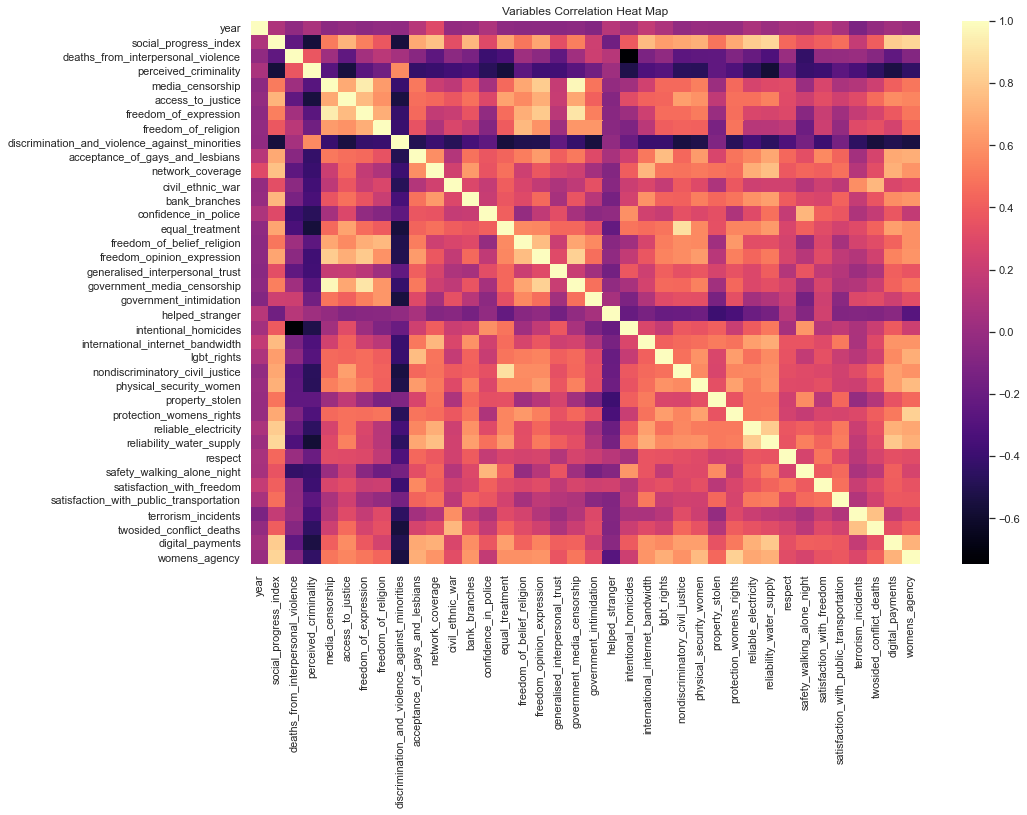

In [69]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = False, cmap = 'magma').set(title='Variables Correlation Heat Map')

[Text(0.5, 1.0, 'Variables Correlation Heat Map')]

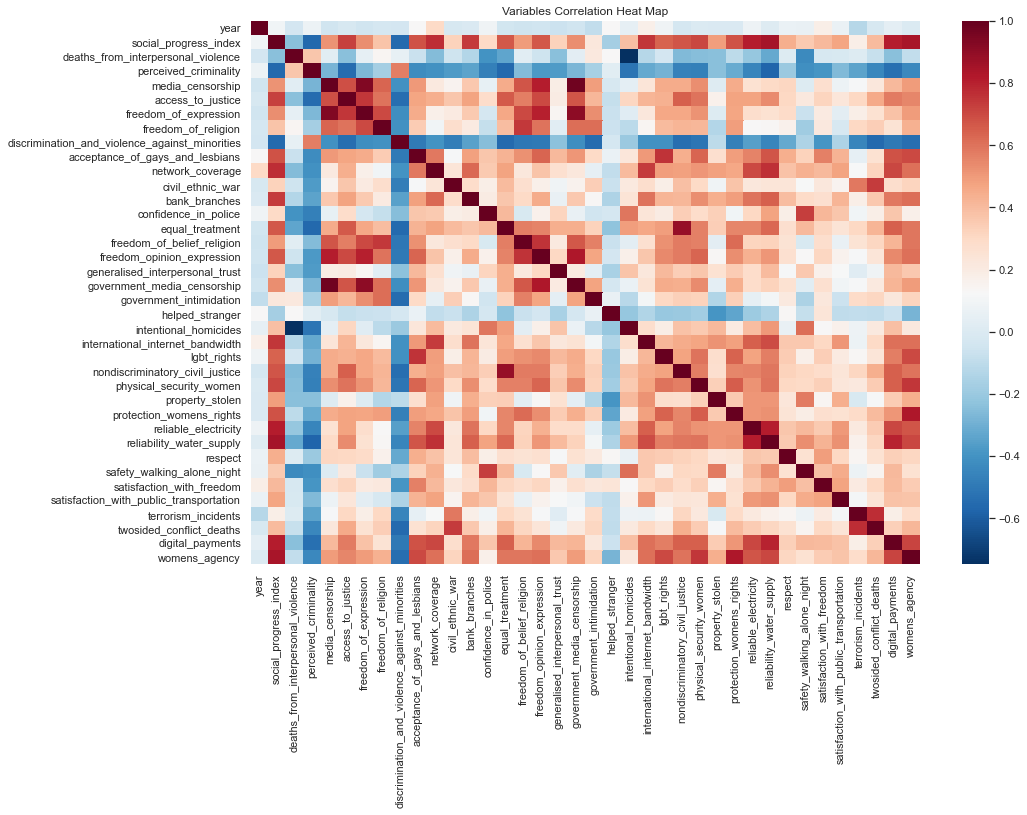

In [155]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = False, cmap = 'RdBu_r').set(title='Variables Correlation Heat Map')

In [70]:
#view
df.groupby(['perceived_criminality', 'country']).agg('mean').head(10)

year  social_progress_index  \
perceived_criminality country                                             
0.2                   Australia           2016.0               0.897891   
                      Canada              2016.0               0.902427   
                      Denmark             2014.5               0.914487   
                      Eritrea             2012.5               0.351050   
                      Iceland             2016.0               0.908391   
                      Japan               2016.0               0.892218   
                      Korea, Republic of  2016.0               0.869382   
                      New Zealand         2016.0               0.893191   
                      Oman                2011.5               0.609100   
                      Singapore           2016.0               0.836100   

                                          deaths_from_interpersonal_violence  \
perceived_criminality country                                                  
0.2                   Australia                                     1.322918   
                      Canada                                        1.636273   
                      Denmark                                       0.749875   
                      Eritrea                                      13.197850   
                      Iceland                                       0.686318   
                      Japan                                         0.489145   
                      Korea, Republic of                            1.348973   
                      New Zealand                                   1.379236   
                      Oman                                          0.819550   
                      Singapore                                     0.442564   

                                          media_censorship  access_to_justice  \
perceived_criminality country                                                   
0.2                   Australia                   0.947591           0.974545   
                      Canada                      0.950977           0.959091   
                      Denmark                     0.978000           0.997000   
                      Eritrea                     0.013500           0.039500   
                      Iceland                     0.913886           0.960273   
                      Japan                       0.789545           0.971000   
                      Korea, Republic of          0.776386           0.959000   
                      New Zealand                 0.945500           0.964818   
                      Oman                        0.083750           0.774000   
                      Singapore                   0.280932           0.861455   

                                          freedom_of_expression  \
perceived_criminality country                                     
0.2                   Australia                        0.954182   
                      Canada                           0.962727   
                      Denmark                          0.991625   
                      Eritrea                          0.019750   
                      Iceland                          0.938818   
                      Japan                            0.906364   
                      Korea, Republic of               0.865364   
                      New Zealand                      0.965818   
                      Oman                             0.146500   
                      Singapore                        0.374818   

                                          freedom_of_religion  \
perceived_criminality country                                   
0.2                   Australia                      0.974477   
                      Canada                         0.958750   
                      Denmark                        0.985750   
                      Eritrea                        0.236500   
              

In [71]:
#view all column names when using .head
pd.set_option('display.max_columns', None)
#sorting by column 'intentional homicides'
df.sort_values(by=['intentional_homicides','perceived_criminality'],ascending=False).head(20)

,country,year,social_progress_index,deaths_from_interpersonal_violence,perceived_criminality,media_censorship,access_to_justice,freedom_of_expression,freedom_of_religion,discrimination_and_violence_against_minorities,acceptance_of_gays_and_lesbians,network_coverage,civil_ethnic_war,bank_branches,confidence_in_police,equal_treatment,freedom_of_belief_religion,freedom_opinion_expression,generalised_interpersonal_trust,government_media_censorship,government_intimidation,helped_stranger,intentional_homicides,international_internet_bandwidth,lgbt_rights,nondiscriminatory_civil_justice,physical_security_women,property_stolen,protection_womens_rights,reliable_electricity,reliability_water_supply,respect,safety_walking_alone_night,satisfaction_with_freedom,satisfaction_with_public_transportation,terrorism_incidents,twosided_conflict_deaths,digital_payments,womens_agency,_merge,area_group
747,Iceland,2011,0.8950,0.7554,0.20,0.92525,0.965,0.947,0.96050,0.10,0.805,0.917467,1.000000,0.822069,0.8375,0.719985,0.821908,0.835313,0.685470,0.92525,0.940476,0.457143,1.000000,0.812761,1.000000,0.690077,0.666667,0.82,0.866667,0.857143,0.980370,0.94,0.7125,0.822950,0.633424,1.000000,1.000000,0.981723,0.937500,both,Western Europe
996,Luxembourg,2015,0.8756,1.0061,NaN,0.96175,0.987,0.953,0.90850,0.31,0.790,0.975767,1.000000,0.880051,0.8125,0.744363,0.821908,0.841186,0.414214,0.96175,1.000000,0.328571,1.000000,1.000000,0.333333,0.713917,1.000000,0.74,0.800000,0.857143,0.959523,0.84,0.6000,0.906149,0.939329,1.000000,1.000000,0.925672,0.875000,both,Western Europe
1463,Singapore,2021,0.8473,0.3978,0.20,0.17800,0.887,0.350,0.81250,0.22,0.550,1.000000,1.000000,0.433905,0.9250,0.894381,0.810097,0.482712,0.453120,0.17800,0.547619,0.442857,0.963690,0.938259,0.000000,0.829728,0.333333,0.96,0.466667,1.000000,0.968275,0.90,0.9625,0.910543,1.000000,1.000000,1.000000,0.901015,0.687500,both,Asia-Pacific
995,Luxembourg,2016,0.8839,1.0142,NaN,0.96175,0.987,0.953,0.90850,0.31,0.810,0.975767,1.000000,0.874802,0.7750,0.744363,0.821908,0.841186,0.414214,0.96175,1.000000,0.285714,0.957709,1.000000,1.000000,0.713917,1.000000,0.82,0.800000,0.857143,0.959523,0.82,0.6375,0.913389,0.933420,1.000000,1.000000,0.925672,0.875000,both,Western Europe
1464,Singapore,2020,0.8457,0.3972,0.20,0.27975,0.889,0.381,0.81250,0.17,0.550,1.000000,1.000000,0.440790,0.9250,0.894381,0.810097,0.482712,0.181818,0.27975,0.547619,0.442857,0.955943,0.938259,0.000000,0.829728,0.333333,0.96,0.466667,1.000000,0.968275,0.90,0.9625,0.910543,1.000000,1.000000,1.000000,0.870240,0.687500,both,Asia-Pacific
1360,Qatar,2014,0.6637,1.1720,0.40,0.22875,0.636,0.213,0.46725,0.49,NaN,0.845867,1.000000,0.515920,0.9250,0.435362,0.289752,0.339971,0.285804,0.22875,0.654762,0.828571,0.955155,0.646792,0.000000,0.431547,0.000000,0.84,0.266667,0.714286,0.848629,0.86,0.9000,0.878917,0.729886,1.000000,1.000000,0.673791,0.250000,both,Middle East and North Africa
1469,Singapore,2015,0.8346,0.3898,0.20,0.29475,0.846,0.370,0.85825,0.31,0.250,0.996667,1.000000,0.461111,0.8500,0.922202,0.784736,0.591325,0.319209,0.29475,0.547619,0.414286,0.953409,0.901468,0.000000,0.967342,0.333333,0.82,0.466667,1.000000,0.972337,0.86,0.8875,0.748289,0.970668,1.000000,1.000000,0.870240,0.687500,both,Asia-Pacific
1361,Qatar,2013,0.6613,1.1971,0.35,0.23600,0.636,0.213,0.46725,0.49,NaN,0.845867,1.000000,0.517709,0.9250,0.435362,0.289752,0.339971,0.285804,0.23600,0.654762,0.828571,0.951215,0.646792,0.000000,0.431547,0.000000,0.84,0.266667,0.714286,0.848629,0.86,0.9000,0.878917,0.729886,1.000000,1.000000,0.673791,0.250000,both,Middle East and North Africa
837,Japan,2020,0.9002,0.4404,0.20,0.72325,0.971,0.868,0.96600,0.28,0.330,0.996333,1.000000,0.708678,0.6750,0.864841,0.663927,0.707383,0.474629,0.72325,0.940476,0.000000,0.946223,0.548569,0.333333,0.787011,0.666667,0.90,0.733333,1.000000,0.945630,0.36,0.6625,0.703348,0.639832,0.992725,1.000000,0.887083,0.687500,both,Asia-Pacific
2020,Hong Kong,2014,NaN,NaN,NaN,0.79550,0.989,0.819,0.85300,NaN,0.575,0.9800

In [72]:
#diverging bars plot
#plotting horizontal lines
#plt.figure(figsize=(14,10), dpi= 80)
#plt.hlines(y=df.index, xmin=0, xmax=df.intentional_homicides, color='blue', alpha=0.4, linewidth=5)
#decorations
#setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Country', xlabel='Safety')
#setting date to y-axis
#plt.yticks(df.index, df.country, fontsize=12)
#title of bar chart
#plt.title('Diverging Bars of Country Safety', fontdict={'size':20})
#optional grid layout
#plt.grid(linestyle='--', alpha=0.5)
#display diverging bar chart
#plt.show()

In [73]:
#top country in 2021
#bottom in 2021
#top region in 2021
#bottom regioin in 2021
#top countries in each region
#bottom in reach region
#heat map of region and ranking for indicators??

In [74]:
#Afghanistan worst
#Singapore best

In [75]:
#bottom countries in each year for saftey walking alone at night

b= df[['country', 'year','safety_walking_alone_night']]#slice dataframe
b= b.sort_values(by='safety_walking_alone_night', ascending=True) #sort ascending
worst_night = b.groupby('year').first() #group by year and show only first in each group
worst_night

,country,safety_walking_alone_night
year,,
2011,South Africa,0.1000
2012,Afghanistan,0.1125
2013,Venezuela,0.0750
2014,Venezuela,0.0000
2015,Venezuela,0.0250
2016,Venezuela,0.0000
2017,Venezuela,0.0000
2018,Venezuela,0.0000
2019,Afghanistan,0.0000


In [128]:
#group safety walking alone by region and year safety walking alone
c= df[['area_group', 'year','safety_walking_alone_night']]#slice dataframe
c= c.sort_values(by='safety_walking_alone_night', ascending=True) #sort ascending
worst_night_region = c.groupby(['year', 'area_group']).first()
worst_night_region

safety_walking_alone_night
year area_group                                                 
2011 Asia-Pacific                                         0.2125
     Eastern Europe                                       0.2250
     Latin America and the Caribbean                      0.1375
     Middle East and North Africa                         0.2500
     North America                                        0.7125
...                                                          ...
2021 Latin America and the Caribbean                      0.1375
     Middle East and North Africa                         0.1500
     North America                                        0.7250
     Sub-Saharan Africa                                   0.1375
     Western Europe                                       0.4500

[77 rows x 1 columns]

In [77]:
#region in 2021
d= df[['area_group', 'year','safety_walking_alone_night']]#slice dataframe
safety_group = d.groupby(['year','area_group'])['safety_walking_alone_night'].agg('mean') #group by year, region, then aggregate by mean

In [141]:
safety_df = pd.DataFrame(safety_group).reset_index()

In [148]:
safety_df

,year,area_group,safety_walking_alone_night
0,2011,Asia-Pacific,0.564379
1,2011,Eastern Europe,0.496739
2,2011,Latin America and the Caribbean,0.305000
3,2011,Middle East and North Africa,0.627439
4,2011,North America,0.737500
5,2011,Sub-Saharan Africa,0.438406
6,2011,Western Europe,0.640000
7,2012,Asia-Pacific,0.606790
8,2012,Eastern Europe,0.517935
9,2012,Latin America and the Caribbean,0.338000


In [143]:
#save to excel sheet for datafolio graph
safety_df.to_excel('safety.xlsx')

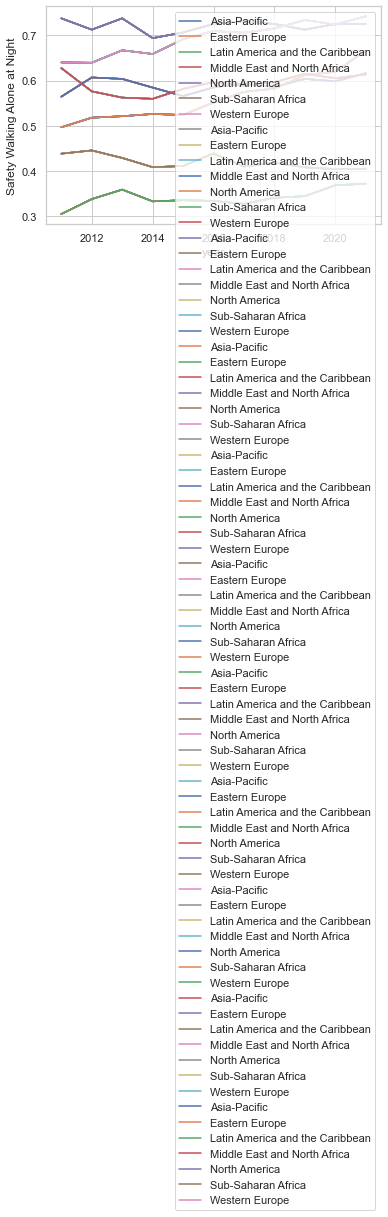

In [172]:
fig, ax = plt.subplots()
for area in safety_df['area_group']:
    ax.plot(safety_df[safety_df.area_group == area].year, safety_df[safety_df.area_group==area].safety_walking_alone_night, label=area)
ax.set_xlabel('year')
ax.set_ylabel('Safety Walking Alone at Night')
ax.legend(loc=True)
        

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


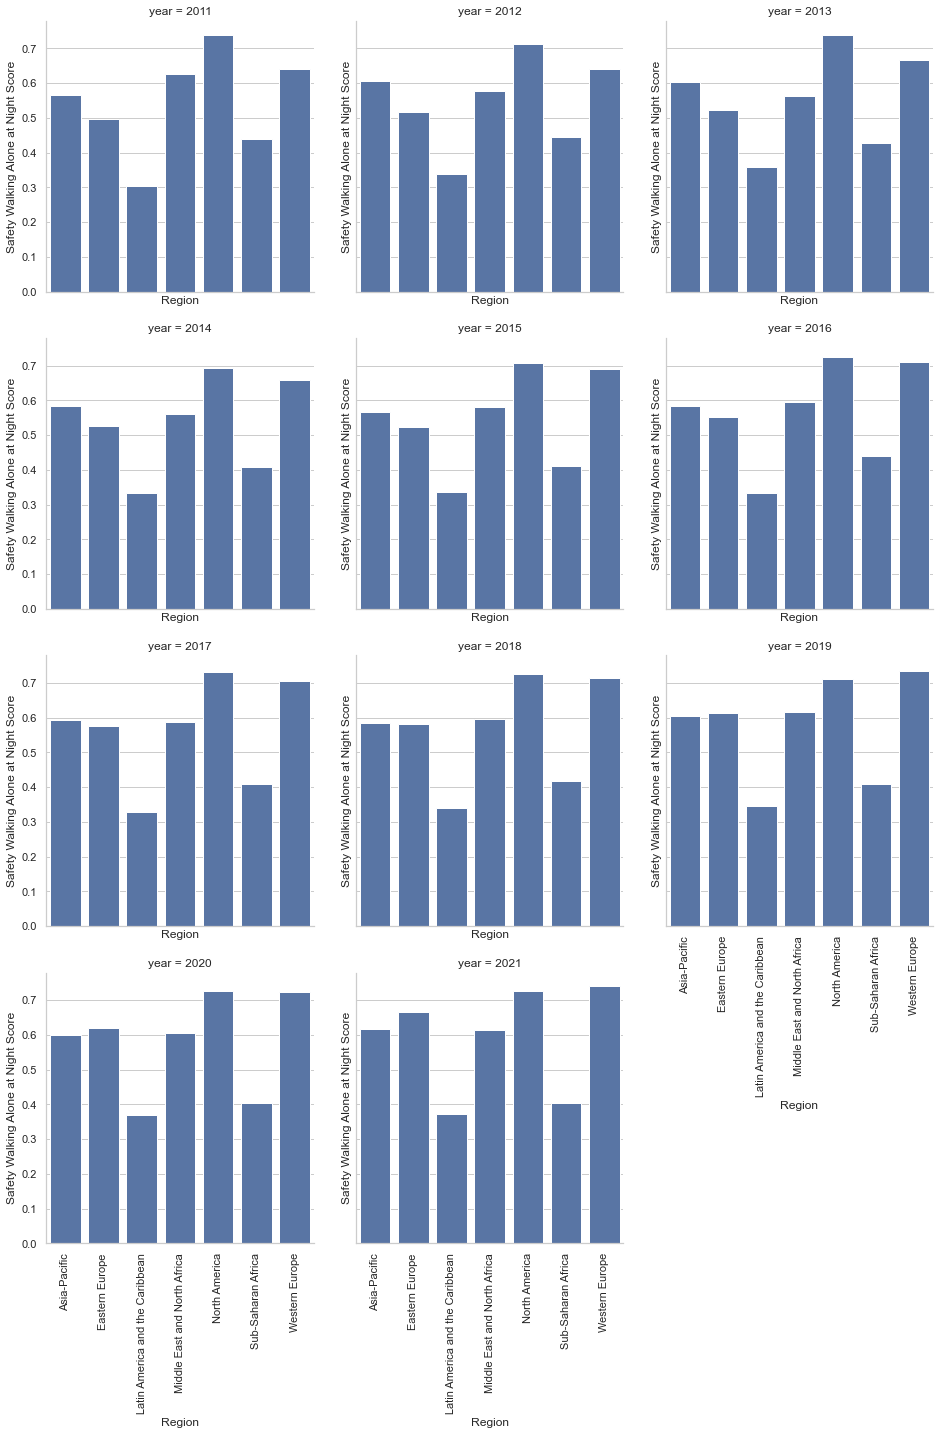

In [80]:
#plot safety walking alone each night for each year per region
safety_graph = sns.FacetGrid(safety_df, col="year", col_wraPp=3, height=4.5, aspect=1.0)
safety_graph.map(sns.barplot, 'area_group', 'safety_walking_alone_night').set(xlabel='Region', ylabel='Safety Walking Alone at Night Score')
safety_graph.set_xticklabels(rotation=90)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


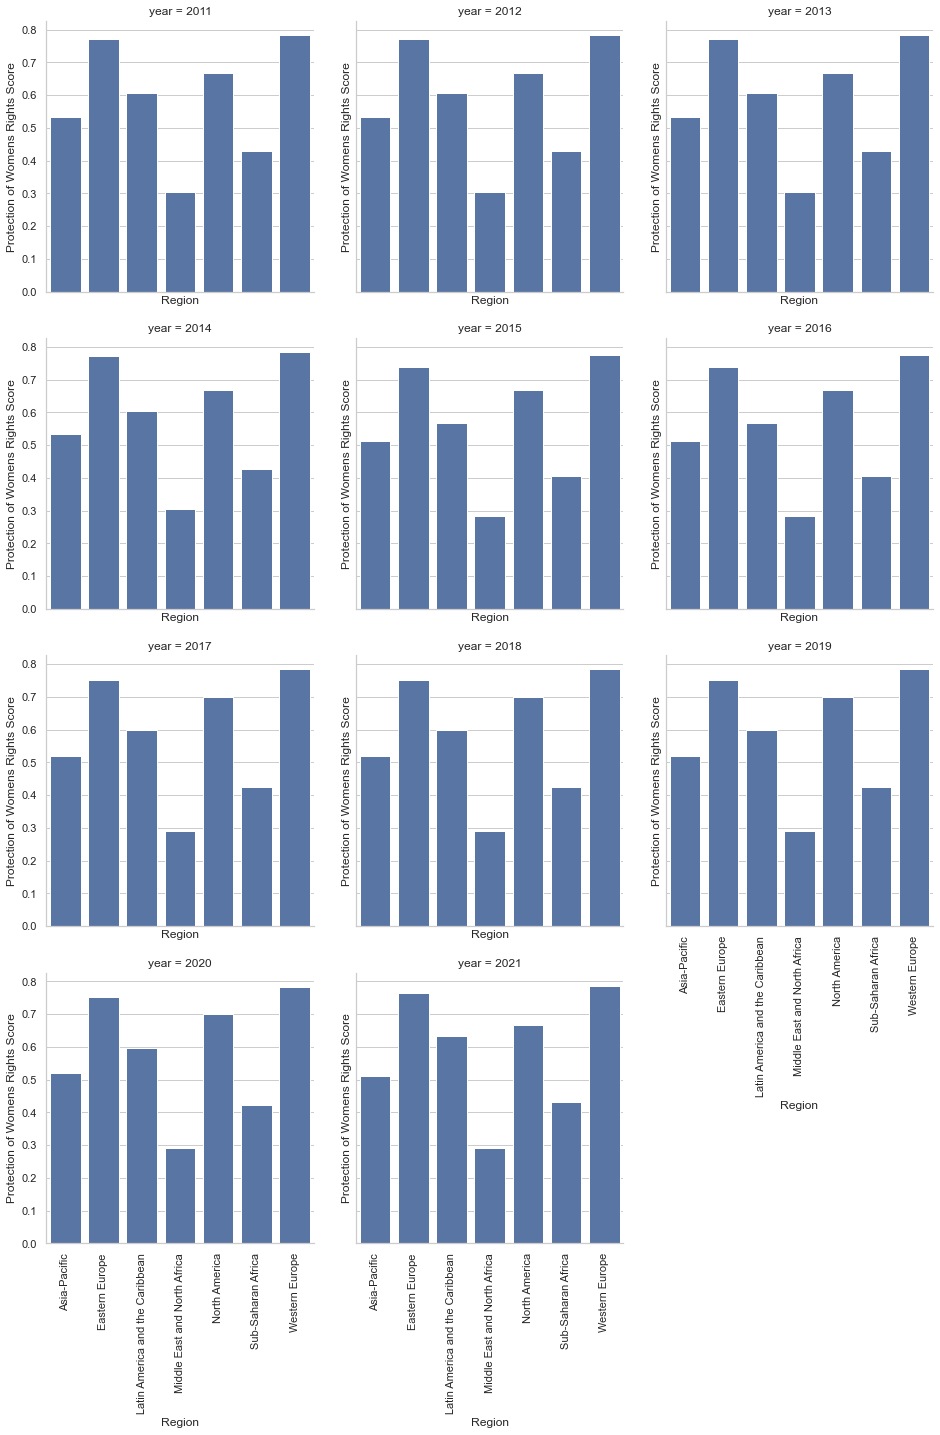

In [111]:
w = df[['area_group', 'year','protection_womens_rights']]#slice dataframe
women_group = w.groupby(['year','area_group'])['protection_womens_rights'].agg('mean') #group by year, region, then aggregate by mean
women_df = pd.DataFrame(women_group).reset_index()

women_graph = sns.FacetGrid(women_df, col="year", col_wrap=3, height=4.5, aspect=1.0)
women_graph.map(sns.barplot, 'area_group', 'protection_womens_rights').set(xlabel='Region', ylabel='Protection of Womens Rights Score')
women_graph.set_xticklabels(rotation=90)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


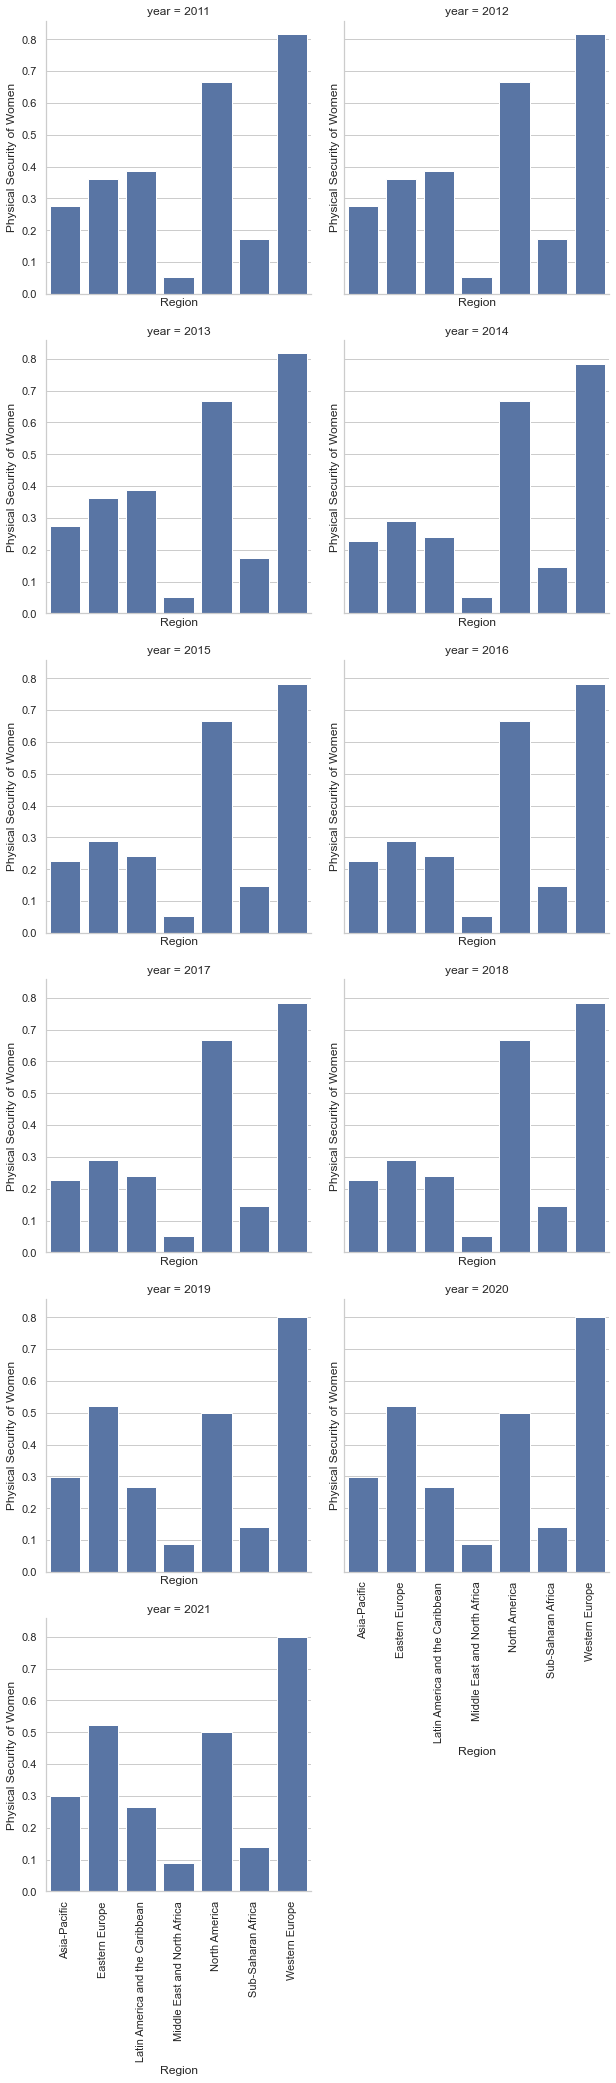

In [119]:
w = df[['area_group', 'year','physical_security_women']]#slice dataframe
women_group = w.groupby(['year','area_group'])['physical_security_women'].agg('mean') #group by year, region, then aggregate by mean
women_df = pd.DataFrame(women_group).reset_index()

women_graph = sns.FacetGrid(women_df, col="year", col_wrap=2, height=4.5, aspect=1.0)
women_graph.map(sns.barplot, 'area_group', 'physical_security_women').set(xlabel='Region', ylabel='Physical Security of Women')
women_graph.set_xticklabels(rotation=90)

In [125]:
women_df = pd.DataFrame(women_group).reset_index()
women_df_avg = women_df.groupby(['area_group'])['physical_security_women'].mean()
women_df_avg

area_group
Asia-Pacific                       0.259593
Eastern Europe                     0.372859
Latin America and the Caribbean    0.287273
Middle East and North Africa       0.062201
North America                      0.621212
Sub-Saharan Africa                 0.151931
Western Europe                     0.796970
Name: physical_security_women, dtype: float64

In [81]:
#group deaths from interpersonal violence by region to see outliers
iv = df[['area_group','deaths_from_interpersonal_violence']]
iv

,area_group,deaths_from_interpersonal_violence
0,Eastern Europe,1.9836
1,Eastern Europe,2.0420
2,Eastern Europe,2.0796
3,Eastern Europe,2.1282
4,Eastern Europe,2.1680
...,...,...
2261,Latin America and the Caribbean,NaN
2262,Asia-Pacific,NaN
2263,Latin America and the Caribbean,NaN
2264,Asia-Pacific,NaN


[Text(0, 0, 'Eastern Europe'),
 Text(1, 0, 'Middle East and North Africa'),
 Text(2, 0, 'Sub-Saharan Africa'),
 Text(3, 0, 'Latin America and the Caribbean'),
 Text(4, 0, 'Asia-Pacific'),
 Text(5, 0, 'Western Europe'),
 Text(6, 0, 'North America')]

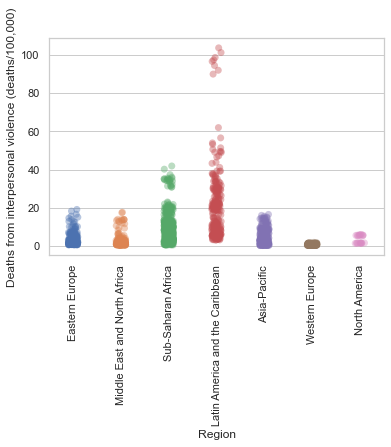

In [82]:
#strip plot to view outliers for variable
sns.set_theme(style="whitegrid")
#ax = sns.stripplot(x=iv["deaths_from_interpersonal_violence"])
ax = sns.stripplot(x="area_group", y='deaths_from_interpersonal_violence', data=iv, size=7, jitter=True, edgecolor='none', alpha=.40) #alpha makes transparent, size increases points
plt.xlabel('Region')
plt.ylabel('Deaths from interpersonal violence (deaths/100,000)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [83]:
#area_group, country, year, social progress
cluster_df = df[['area_group', 'country', 'year', 'social_progress_index']]

[Text(0.5, 1.0, 'ClusterMap Heat Map')]

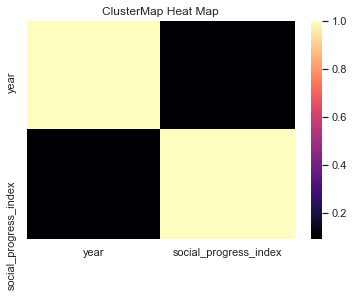

In [84]:
sns.heatmap(cluster_df.corr(), annot = False, cmap = 'magma').set(title='ClusterMap Heat Map')

In [85]:
# pandas pivot with multiple variables
#reshape the long form data to wide form data.

heatmap_data = pd.pivot_table(df, values='social_progress_index', 
                              index=['area_group','country'], 
                              columns='year')

heatmap_data.head()

year                       2011    2012    2013    2014    2015    2016  \
area_group   country                                                      
Asia-Pacific Australia   0.8956  0.8963  0.8949  0.8917  0.8972  0.8984   
             Bangladesh  0.5034  0.5097  0.5175  0.5240  0.5372  0.5414   
             Cambodia    0.4609  0.4673  0.4870  0.4931  0.5056  0.5128   
             China       0.5836  0.5906  0.5950  0.5975  0.6131  0.6209   
             India       0.5253  0.5374  0.5402  0.5497  0.5586  0.5565   

year                       2017    2018    2019    2020    2021  
area_group   country                                             
Asia-Pacific Australia   0.8997  0.8989  0.9000  0.9013  0.9028  
             Bangladesh  0.5564  0.5556  0.5662  0.5707  0.5687  
             Cambodia    0.5122  0.5157  0.5233  0.5344  0.5452  
             China       0.6302  0.6375  0.6424  0.6465  0.6544  
             India       0.5678  0.5736  0.5893  0.5794  0.5881

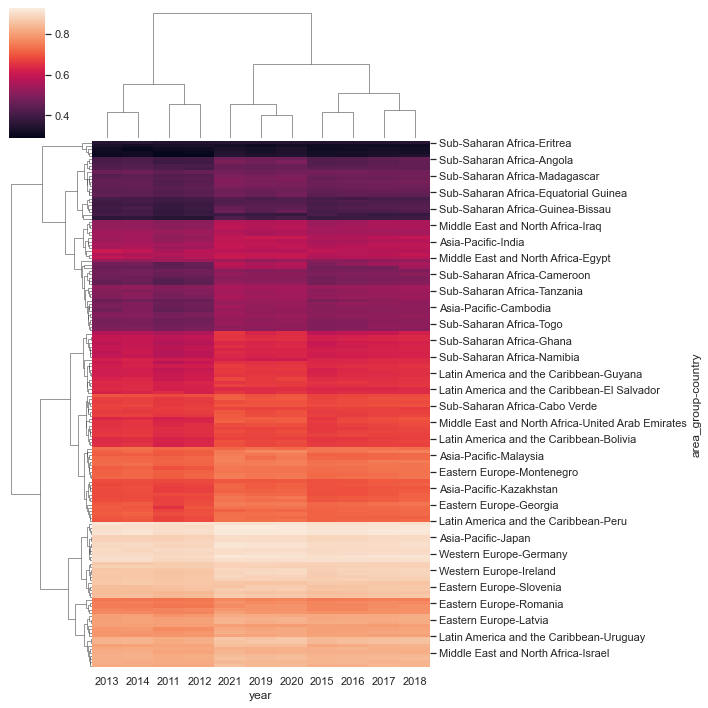

In [165]:
# make heatmap with Seaborn ClusterMap
#both columns and rows and adds dendrograms to show the clustering
sns.clustermap(heatmap_data)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg')

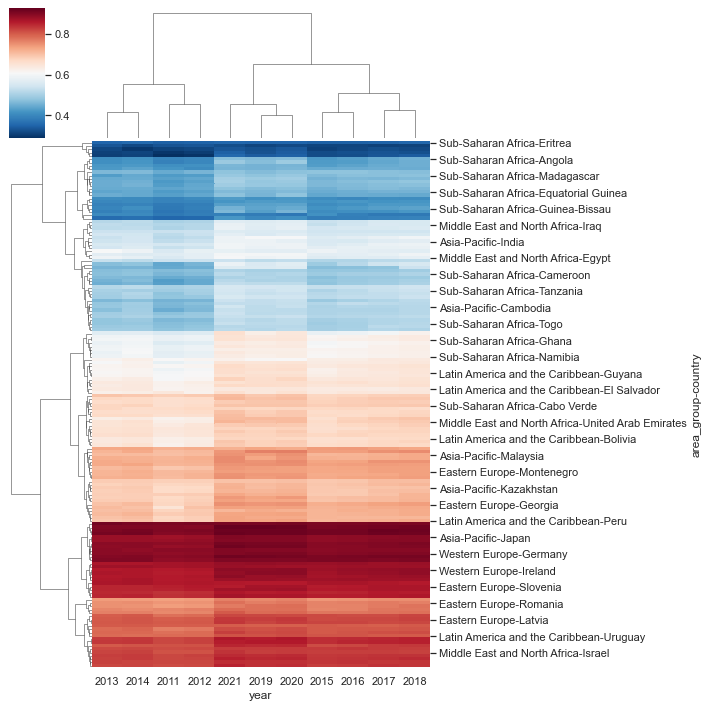

In [166]:
#testing....will delete
# make heatmap with Seaborn ClusterMap
#both columns and rows and adds dendrograms to show the clustering
sns.clustermap(heatmap_data, cmap='RdBu_r')

Text(0, 0.5, 'Region')

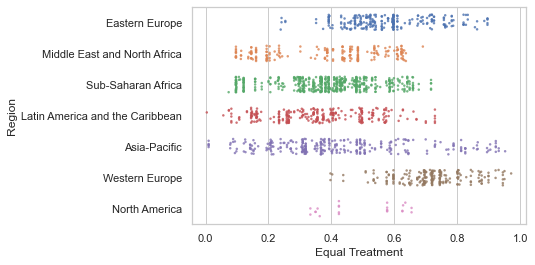

In [88]:
#strip plot

sns.set_theme(style="whitegrid")
equal = sns.stripplot( x='equal_treatment', y= 'area_group', data = df, size=2.5, jitter=0.25, edgecolor='none', alpha=.80)
plt.xlabel('Equal Treatment')
plt.ylabel('Region')

Text(0, 0.5, 'Region')

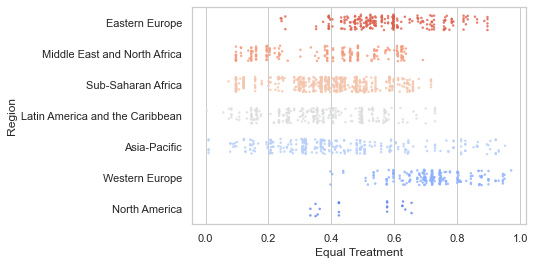

In [167]:
#strip plot

sns.set_theme(style="whitegrid")
equal = sns.stripplot( x='equal_treatment', y= 'area_group', data = df, size=2.5, palette='coolwarm_r', jitter=0.25, edgecolor='none', alpha=.80)
plt.xlabel('Equal Treatment')
plt.ylabel('Region')

[Text(0, 0, 'Eastern Europe'),
 Text(1, 0, 'Middle East and North Africa'),
 Text(2, 0, 'Sub-Saharan Africa'),
 Text(3, 0, 'Latin America and the Caribbean'),
 Text(4, 0, 'Asia-Pacific'),
 Text(5, 0, 'Western Europe'),
 Text(6, 0, 'North America')]

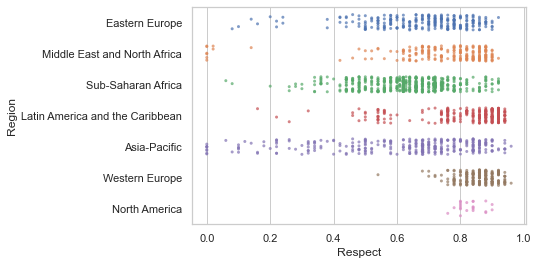

In [89]:
#strip plot
sns.set_theme(style="whitegrid")
equal = sns.stripplot( x='respect', y= 'area_group', data = df, size=3, jitter=0.25, edgecolor='none', alpha=.70)
plt.xlabel('Respect')
plt.ylabel('Region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<ipython-input-170-9bcd6f9bdc61>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(2010.0, 0, '2010'),
 Text(2012.0, 0, '2012'),
 Text(2014.0, 0, '2014'),
 Text(2016.0, 0, '2016'),
 Text(2018.0, 0, '2018'),
 Text(2020.0, 0, '2020'),
 Text(2022.0, 0, '2022')]

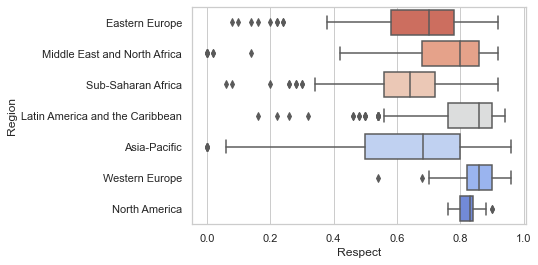

In [170]:
#box plot
sns.set_theme(style="whitegrid")
equal = sns.boxplot( x='respect', y= 'area_group', data = df, palette='coolwarm_r')
plt.xlabel('Respect')
plt.ylabel('Region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

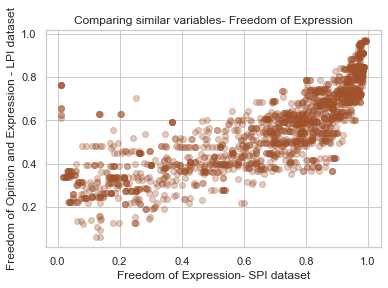

In [159]:
#plot correlation for similar variables from both datasets
plt.scatter(x = df['freedom_of_expression'], y = df['freedom_opinion_expression'], color = 'sienna', alpha=0.3)
plt.title("Comparing similar variables- Freedom of Expression")
plt.xlabel("Freedom of Expression- SPI dataset")
plt.ylabel("Freedom of Opinion and Expression - LPI dataset")
plt.show()

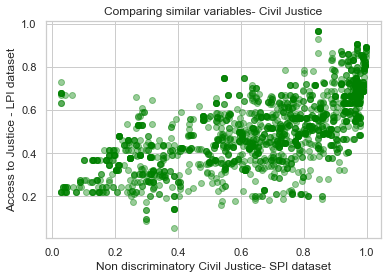

In [91]:
#plot correlation for similar variables from both datasets
plt.scatter(x = df['access_to_justice'], y = df['nondiscriminatory_civil_justice'], color = 'green', alpha=0.4)
plt.title("Comparing similar variables- Civil Justice")
plt.xlabel("Non discriminatory Civil Justice- SPI dataset")
plt.ylabel("Access to Justice - LPI dataset")
plt.show()

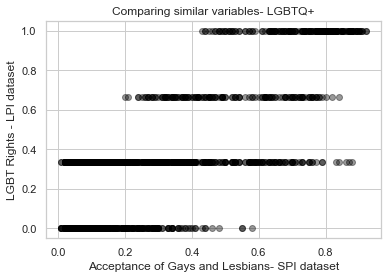

In [92]:
#plot correlation for similar variables from both datasets
plt.scatter(x = df['acceptance_of_gays_and_lesbians'], y = df['lgbt_rights'], color = 'black', alpha=0.4)
plt.title("Comparing similar variables- LGBTQ+")
plt.xlabel("Acceptance of Gays and Lesbians- SPI dataset")
plt.ylabel("LGBT Rights - LPI dataset")
plt.show()

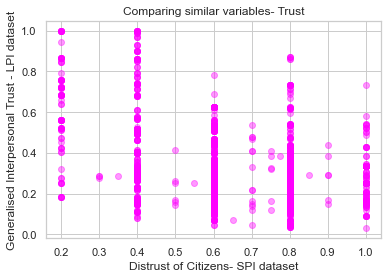

In [126]:
#plot correlation for similar variables from both datasets
plt.scatter(x = df['perceived_criminality'], y = df['generalised_interpersonal_trust'], color = 'magenta', alpha=0.4)
plt.title("Comparing similar variables- Trust")
plt.xlabel("Distrust of Citizens- SPI dataset")
plt.ylabel("Generalised Interpersonal Trust - LPI dataset")
plt.show()

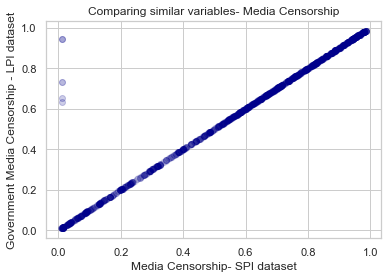

In [160]:
#plot correlation for similar variables from both datasets
plt.scatter(x = df['media_censorship'], y = df['government_media_censorship'], color = 'darkblue', alpha=.1)
plt.title("Comparing similar variables- Media Censorship")
plt.xlabel("Media Censorship- SPI dataset")
plt.ylabel("Government Media Censorship - LPI dataset")
plt.show()

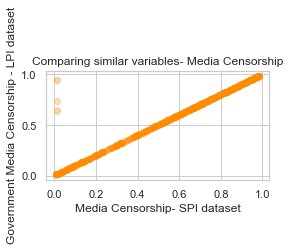

In [108]:
#plot correlation for similar variables from both datasets
plt.figure(figsize = (4,2))
plt.scatter(x = df['media_censorship'], y = df['government_media_censorship'], color = 'darkorange', alpha=.1)
plt.title("Comparing similar variables- Media Censorship")
plt.xlabel("Media Censorship- SPI dataset")
plt.ylabel("Government Media Censorship - LPI dataset")
plt.show()

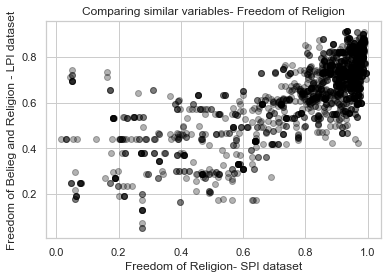

In [132]:
#plot correlation for similar variables from both datasets
plt.scatter(x = df['freedom_of_religion'], y = df['freedom_of_belief_religion'], color = 'black', alpha=0.3)
plt.title("Comparing similar variables- Freedom of Religion")
plt.xlabel("Freedom of Religion- SPI dataset")
plt.ylabel("Freedom of Belieg and Religion - LPI dataset")
plt.show()

In [139]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
country,country,0.000000
year,year,0.000000
social_progress_index,social_progress_index,18.446602
deaths_from_interpersonal_violence,deaths_from_interpersonal_violence,1.941748
perceived_criminality,perceived_criminality,22.109444
media_censorship,media_censorship,15.533981
access_to_justice,access_to_justice,15.533981
freedom_of_expression,freedom_of_expression,15.533981
freedom_of_religion,freedom_of_religion,15.533981
discrimination_and_violence_against_minorities,discrimination_and_violence_against_minorities,14.518976


In [27]:
final_df = df

In [28]:
#save df to csv file
final_df.to_csv('final_df.csv', index = False)